---
<p>&nbsp;</p>
<div style="text-align:center"><font style="color:#0CA7DB; font-family:Play; font-size:3em;">FACEIT Predictor Notebook</font></div>
<p>&nbsp;</p>

<img style="float: center;" src="128.png">

---

This notebook covers the development of the Machine Learning model to be used in the browser extension FACEIT Predictor. The model predicts the outcome of Counter Strike Global Offensive (a 5v5 First Person Shooter eSport) matches played on the FACEIT platform.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Matplotlib-and-Seaborn-defaults" data-toc-modified-id="Matplotlib-and-Seaborn-defaults-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Matplotlib and Seaborn defaults</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load Data</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Analyze-and-Describe" data-toc-modified-id="Analyze-and-Describe-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analyze and Describe</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clean Data</a></span></li><li><span><a href="#Players-Analysis" data-toc-modified-id="Players-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Players Analysis</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#New-Experimental-Features" data-toc-modified-id="New-Experimental-Features-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>New Experimental Features</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Prepare-data-for-training" data-toc-modified-id="Prepare-data-for-training-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Prepare data for training</a></span></li></ul></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#H2O-Auto-ML-test" data-toc-modified-id="H2O-Auto-ML-test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>H2O Auto ML test</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li><li><span><a href="#Model-and-Feature-Selection" data-toc-modified-id="Model-and-Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model and Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Neural Networks</a></span></li></ul></li><li><span><a href="#Model-Deployment" data-toc-modified-id="Model-Deployment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Deployment</a></span><ul class="toc-item"><li><span><a href="#Save-Model" data-toc-modified-id="Save-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Save Model</a></span></li></ul></li></ul></div>

# Introduction
TODO: WRITE THIS SECTION State the purpose of the notebook here and how it is structured

## Imports
Import libraries and other required jupyter notebooks and python modules.

In [45]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Utils for feature creation
from datetime import datetime
import math
import scipy
from statistics import mean
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.feature_selection import RFE, RFECV

# Outlier Detection
from sklearn.neighbors import LocalOutlierFactor

# Classifiers
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Neural network libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Model selection and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# h2o Auto machine learning
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.xgboost import H2OXGBoostEstimator

# Classifier metrics
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Save the ML model
import joblib

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from IPython import get_ipython

ipython = get_ipython()

# Developed python modules
import load_faceit_data as loader
import add_features

# Import other jupyter notebooks
# import import_ipynb
# import MongoDBAtlas

# autoreload extension
if "autoreload" not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2
%autosave 0
%load_ext nb_black

Autosave disabled
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [46]:
is_xgboost_available = H2OXGBoostEstimator.available()

Cannot build an XGBoost model - no backend found.


<IPython.core.display.Javascript object>

In [47]:
h2o.cluster().show_status()

H2O cluster uptime:,25 mins 26 secs
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_hmbf1_7fq0d3
H2O cluster total nodes:,1
H2O cluster free memory:,6.953 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


<IPython.core.display.Javascript object>

## Matplotlib and Seaborn defaults

In [2]:
sns.set_style("dark")
plt.rcParams["axes.facecolor"] = "#2D3441"
plt.rcParams["figure.facecolor"] = "none"
plt.rcParams["text.color"] = "white"
plt.rcParams["ytick.color"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["axes.labelsize"] = "13"
plt.rcParams["axes.titlesize"] = "20"

<IPython.core.display.Javascript object>

## Load Data
Currently, the data can be loaded in two ways:
1. From a locally stored JSON file
2. From a MongoDB database hosted in the local network

In [3]:
params = {"filename": "data\matches_02.json"}
dataset = loader.load_data(load_type="json", **params)

<IPython.core.display.Javascript object>

# Data Preprocessing

## Analyze and Describe
TODO: Add more functions to pre-analyze the data

In [ ]:
# Change object types (to strings, categorical or numeric)

In [7]:
dataset.describe(exclude=[np.object])

ValueError: No objects to concatenate

<IPython.core.display.Javascript object>

In [4]:
# Sample 10% of the whole dataset
dataset = dataset.sample(frac=0.1)

<IPython.core.display.Javascript object>

In [5]:
dataset.shape

(1496, 11)

<IPython.core.display.Javascript object>

## Clean Data

In [5]:
faceit_maps = [
    "de_train",
    "de_inferno",
    "de_mirage",
    "de_vertigo",
    "de_nuke",
    "de_overpass",
    "de_cache",
    "de_dust2",
]
date_format = "%Y-%m-%dT%H:%M:%SZ"

<IPython.core.display.Javascript object>

In [6]:
def clean_dataframe(data):
    print("Dataframe's shape before cleaning", data.shape)

    data.drop(
        columns=["_id", "_id__stitch_transaction", "state", "match_status"],
        inplace=True,
    )
    data = data[data["score"].notnull()]
    data = data[data["mapPlayed"].isin(faceit_maps)]

    # Removal of duplicate matches
    data.drop_duplicates(subset=["match_id"], keep="first", inplace=True)

    # Removal of non 5v5 matches
    data.loc[:, "num_players"] = data.apply(
        lambda row: get_num_players(row), axis=1
    ).values
    data = data[data["num_players"] == 10]

    print("Dataframe's shape after cleaning", data.shape)
    return data


def get_num_players(row):
    return len(row["teamA"]) + len(row["teamB"])

<IPython.core.display.Javascript object>

In [7]:
dataset = clean_dataframe(dataset)

Dataframe's shape before cleaning (1496, 11)
Dataframe's shape after cleaning (1343, 8)


<IPython.core.display.Javascript object>

## Players Analysis

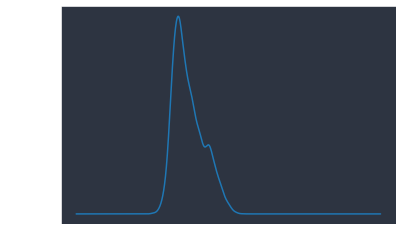

<IPython.core.display.Javascript object>

In [8]:
def get_all_players_elos(data):
    all_players = []
    for _, row in data.iterrows():
        for player_id, player_info in row["teamA"].items():
            all_players.append(player_info["elo"])
        for player_id, player_info in row["teamB"].items():
            all_players.append(player_info["elo"])
    return all_players


def get_player_elo_kde(data):
    player_elos = get_all_players_elos(data)
    player_elos = np.array(player_elos)
    player_elos_series = pd.Series(player_elos)
    kde = player_elos_series.plot.kde(ind=1000)
    xdata, ydata = kde.get_lines()[0].get_data()
    return scipy.integrate.cumtrapz(ydata, xdata, dx=1, initial=0), xdata


def get_elo_dif_prob(lower_bound, upper_bound, cdf, bins):
    lower_bin = (np.abs(bins - lower_bound)).argmin()
    upper_bin = (np.abs(bins - upper_bound)).argmin()
    return cdf[upper_bin] - cdf[lower_bin]


players_elo_distribution, elo_bins = get_player_elo_kde(dataset)

In [9]:
def get_all_players_info(data):
    players_id = []
    elos = []
    matches = []
    winrates = []
    kds = []
    hs_percents = []
    # add createdAt (accounts created a long time ago with few matches might be smurfs)
    for _, row in data.iterrows():
        for player_id, player_info in row["teamA"].items():
            if player_info["lifetimeData"] == None:
                players_id.append(0)
                elos.append(0)
                matches.append(0)
                winrates.append(0)
                kds.append(0)
                hs_percents.append(0)
                continue
            players_id.append(player_info["id"])
            elos.append(player_info["elo"])
            matches.append(int(player_info["lifetimeData"]["matches"]))
            winrates.append(int(player_info["lifetimeData"]["winRate"]))
            kds.append(float(player_info["lifetimeData"]["averageKD"]))
            hs_percents.append(int(player_info["lifetimeData"]["averageHS"]))

        for player_id, player_info in row["teamB"].items():
            if player_info["lifetimeData"] == None:
                players_id.append(0)
                elos.append(0)
                matches.append(0)
                winrates.append(0)
                kds.append(0)
                hs_percents.append(0)
                continue
            players_id.append(player_info["id"])
            elos.append(player_info["elo"])
            matches.append(int(player_info["lifetimeData"]["matches"]))
            winrates.append(int(player_info["lifetimeData"]["winRate"]))
            kds.append(float(player_info["lifetimeData"]["averageKD"]))
            hs_percents.append(int(player_info["lifetimeData"]["averageHS"]))

    return (
        np.array(players_id),
        np.array(elos),
        np.array(matches),
        np.array(winrates),
        np.array(kds),
        np.array(hs_percents),
    )

<IPython.core.display.Javascript object>

In [10]:
players_id, elos, matches, winrates, kds, hs_percents = get_all_players_info(dataset)
array = [[elos[i], matches[i], winrates[i], kds[i]] for i in range(len(elos))]
X = np.array(array)

<IPython.core.display.Javascript object>

In [11]:
mean_winrate = mean(winrates)
mean_kd = mean(kds)

<IPython.core.display.Javascript object>

In [12]:
lof = LocalOutlierFactor(contamination=0.05)
lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

<IPython.core.display.Javascript object>

In [13]:
def smurf_or_cheater_prob(outlier_model):
    # Check if user is verified (then, it is probably a pro)
    transformed_outlier_factor = []
    for i in range(len(outlier_model.negative_outlier_factor_)):
        if (
            (outlier_model.negative_outlier_factor_[i] < -1)
            and (winrates[i] > mean_winrate)
            and (kds[i] > mean_kd)
        ):
            transformed_outlier_factor.append(
                math.log(-outlier_model.negative_outlier_factor_[i]) * 100
            )
        else:
            transformed_outlier_factor.append(0)
        arr = np.array(transformed_outlier_factor)

    team_A = arr.reshape(-1, 5)[::2, :]
    team_B = arr.reshape(-1, 5)[1::2, :]

    dataset["smurf_or_cheater_A"] = np.mean(team_A, axis=1)
    dataset["smurf_or_cheater_B"] = np.mean(team_B, axis=1)
    dataset["dif_smurf_or_cheater"] = (
        dataset["smurf_or_cheater_A"] - dataset["smurf_or_cheater_B"]
    )

<IPython.core.display.Javascript object>

In [14]:
smurf_or_cheater_prob(lof)

<IPython.core.display.Javascript object>

## Feature Engineering

In [15]:
dataset.loc[:, "unix_start_time"] = (
    pd.to_datetime(dataset["startTime"], format=date_format)
    .values.astype("datetime64[s]")
    .astype("int")
)
dataset.drop(columns=["startTime"], inplace=True)

<IPython.core.display.Javascript object>

In [16]:
add_features.add_all_team_features(dataset)

<IPython.core.display.Javascript object>

In [17]:
dataset.loc[:, "missing_info"] = dataset.apply(
    lambda row: add_features.get_missing_info(row), axis=1
).values

<IPython.core.display.Javascript object>

In [18]:
def dif_elo_prob(row):
    return get_elo_dif_prob(
        row["mean_elo_A"], row["mean_elo_B"], players_elo_distribution, elo_bins
    )


dataset.loc[:, "dif_elo_prob"] = dataset.apply(
    lambda row: dif_elo_prob(row), axis=1
).values

<IPython.core.display.Javascript object>

In [19]:
def convert_winner_to_numeric(row):
    winner_numeric = 0 if row["score"] == "faction1" else 1
    return winner_numeric


dataset.loc[:, "winner"] = dataset.apply(
    lambda row: convert_winner_to_numeric(row), axis=1
).values

<IPython.core.display.Javascript object>

### New Experimental Features
Creation and test of new features. Once validated the correspondent function should be moved to `add_features.py`.

## Visualization

In [20]:
def split_dataset_winners(dataset):
    return dataset[dataset["winner"] == 0], dataset[dataset["winner"] == 1]


data_winner_A, data_winner_B = split_dataset_winners(dataset)

<IPython.core.display.Javascript object>

In [21]:
def comp_featured_based_on_winner(feature, num_bins=100, title=None):
    plt.figure(figsize=(12, 6))
    ax = sns.distplot(
        data_winner_A[feature],
        kde=False,
        bins=num_bins,
        color="#FF5500",
        hist_kws=dict(alpha=0.8),
    )
    print("Team A - Feature Mean Value", np.mean(data_winner_A[feature]))

    sns.distplot(
        data_winner_B[feature],
        kde=False,
        bins=num_bins,
        color="#141616",
        hist_kws=dict(alpha=0.8),
        ax=ax,
    )
    print("Team B - Feature Mean Value", np.mean(data_winner_B[feature]))
    ax.set_title(title)
    ax.legend(["A", "B"], title="Winner team")
    return ax

<IPython.core.display.Javascript object>

Team A - Feature Mean Value 0.06718027734976909
Team B - Feature Mean Value -0.6455331412103754


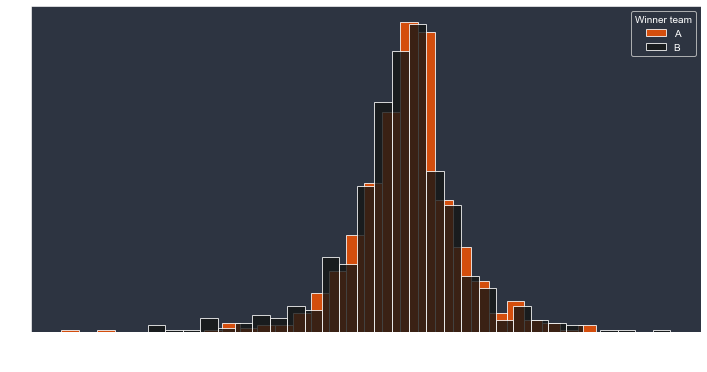

<IPython.core.display.Javascript object>

In [22]:
ax = comp_featured_based_on_winner("dif_mean_winrate_preference", num_bins=30)

# Configure axes limits
# ax.set_xlim(x_left, x_right)
# ax.set_ylim(y_bottom, y_top)

## Prepare data for training

In [23]:
selected_cols = [
    "dif_new_players",
    "dif_mean_matches",
    "dif_mean_matches_on_map",
    "dif_mean_winrate_on_map",
    "dif_mean_kd_on_map",
    "dif_mean_matches_preference",
    "dif_mean_winrate_preference",
    "dif_mean_kd_preference",
    "dif_mean_elo",
    "dif_stddev_elo",
    "dif_paid_memberships",
    "dif_solo_players",
    "dif_num_parties",
    "dif_mean_matches_on_map_prev",
    "dif_mean_winrate_prev",
    "dif_multikills_prev",
    "dif_mean_assists_prev",
    "dif_mean_kd_prev",
    "dif_mean_time_prev",
    "dif_delta_mean_elo_prev",
    "dif_smurf_or_cheater",
    "dif_max_time_prev",
    "dif_elo_prob",
    "dif_first_match",
    "dif_mean_time_created_at",
    "dif_stddev_time_created_at",
    "dif_min_time_created_at",
    "dif_mean_matches_today",
    "dif_played_map_today",
    "dif_have_played_together_prev",
    "winner",
]

data_processed = dataset[selected_cols]
data_label = data_processed["winner"]
data_features = data_processed.drop(columns=["winner"])

<IPython.core.display.Javascript object>

In [38]:
data_processed.to_csv("small_data_processed.csv")

<IPython.core.display.Javascript object>

# Baseline
Show graphs and stats here

## Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data_label, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [25]:
# Baseline model: Random Forest with default parameters
rf = RandomForestClassifier()

<IPython.core.display.Javascript object>

In [26]:
# Alternative Baseline Model with slightly better performance
# rf = RandomForestClassifier(n_estimators=1500,
#                             max_features= 0.3,
#                             max_depth=7,
#                             min_samples_leaf=0.005,
#                             random_state=41)

<IPython.core.display.Javascript object>

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<IPython.core.display.Javascript object>

## Evaluation

In [28]:
def print_metrics(model, X_train, y_train, X_test, y_test):
    print("Model Score (Mean accuracy on test data)", model.score(X_test, y_test))
    pred = model.predict(X_test)
    print("\nClassification Report")
    print(classification_report(y_test, pred))
    roc_graph = plot_roc_curve(model, X_test, y_test)

<IPython.core.display.Javascript object>

Model Score (Mean accuracy on test data) 0.5707196029776674

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.57      0.56       189
           1       0.60      0.57      0.59       214

    accuracy                           0.57       403
   macro avg       0.57      0.57      0.57       403
weighted avg       0.57      0.57      0.57       403



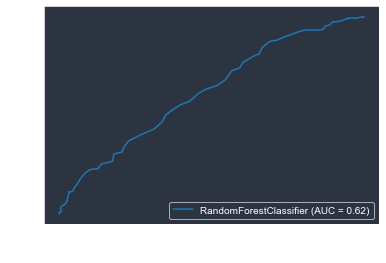

<IPython.core.display.Javascript object>

In [29]:
print_metrics(rf, X_train, y_train, X_test, y_test)

<Figure size 1440x1440 with 0 Axes>

(31.0, 0.0)

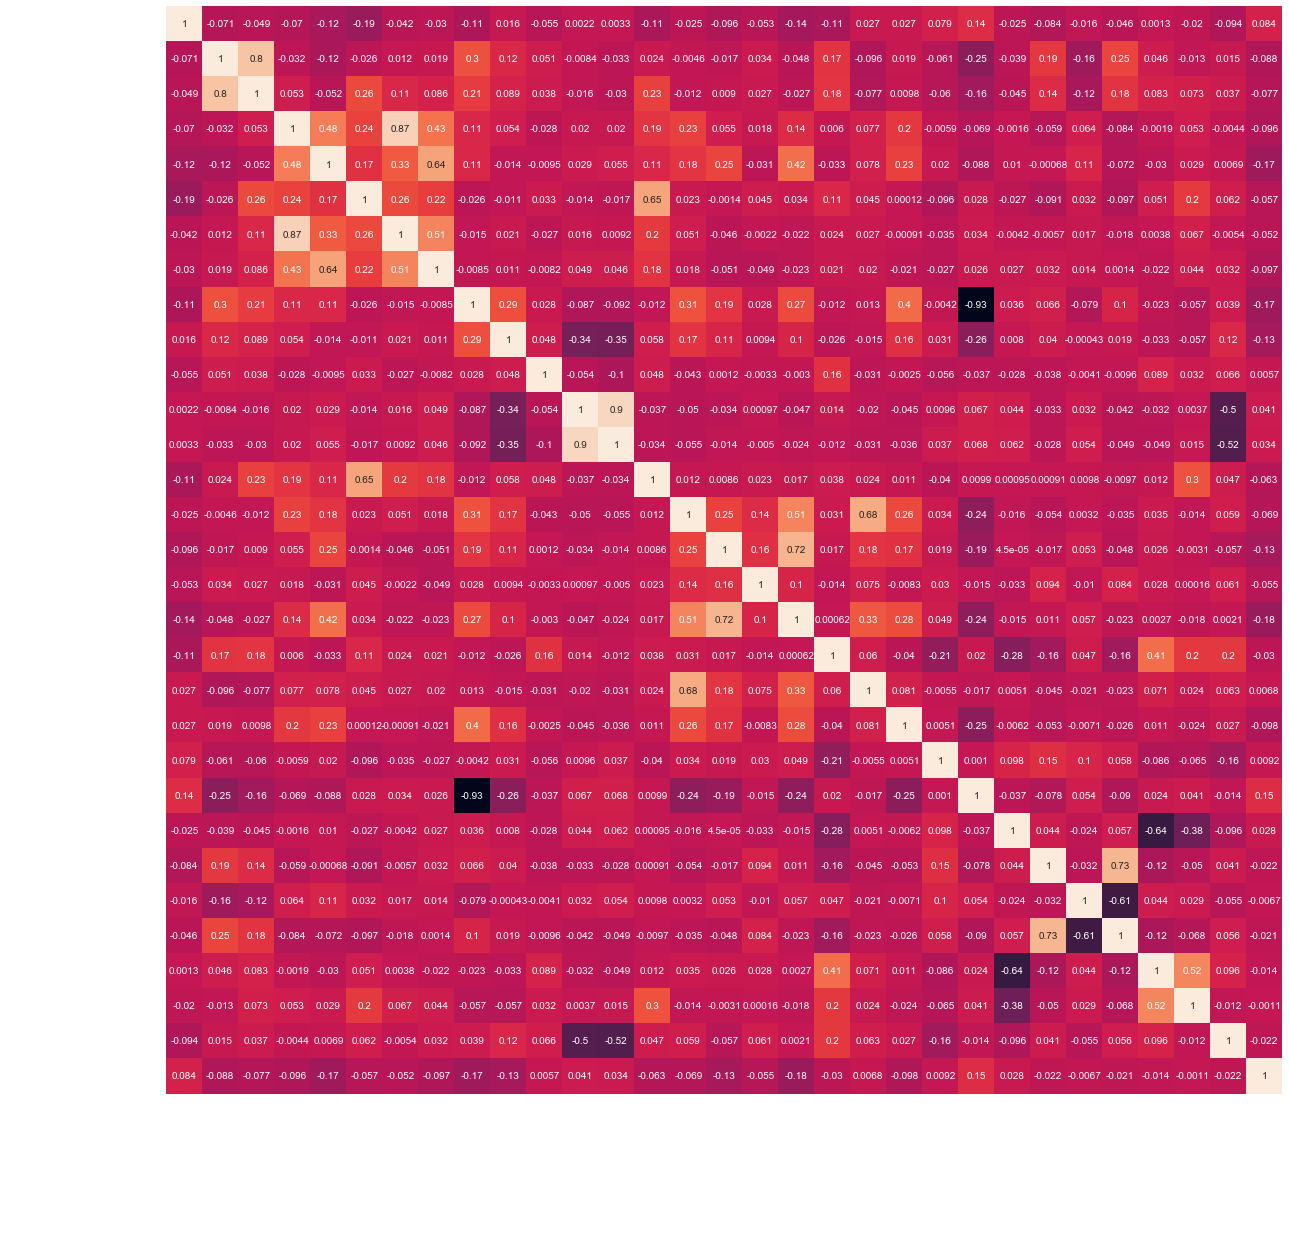

<IPython.core.display.Javascript object>

In [36]:
# Displays the correlation matrix regarding the features present in dataset
corr_mat = data_processed.corr()
plt.figure(figsize=(20, 20))
ax = sns.heatmap(corr_mat, annot=True, cbar=False, annot_kws={"size": 10})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [37]:
permutation_info = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=0, n_jobs=-1
)

features_info = list(
    zip(
        X_train.columns,
        permutation_info["importances_mean"],
        permutation_info["importances_std"],
    )
)

# Sort by descending mean feature importance
features_info = sorted(features_info, key=lambda feature: feature[1], reverse=True)

features_imp_df = pd.DataFrame(
    features_info, columns=["feature_name", "mean_importance", "stddev_importance"]
)

features_imp_df.head(40)

,feature_name,mean_importance,stddev_importance
0,dif_mean_kd_on_map,0.011815,0.001732
1,dif_mean_kd_prev,0.004511,0.001579
2,dif_stddev_elo,0.002578,0.001376
3,dif_mean_elo,0.001933,0.001052
4,dif_mean_winrate_prev,0.000752,0.000492
5,dif_stddev_time_created_at,0.000537,0.000721
6,dif_mean_matches_preference,0.000430,0.000526
7,dif_mean_matches_on_map_prev,0.000322,0.000492
8,dif_paid_memberships,0.000215,0.000430
9,dif_mean_time_created_at,0.000215,0.000430


<IPython.core.display.Javascript object>

## H2O Auto ML test

In [30]:
h2o.init(max_mem_size="8G")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\hmbf1\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\hmbf1\AppData\Local\Temp\tmpe1u20scs
  JVM stdout: C:\Users\hmbf1\AppData\Local\Temp\tmpe1u20scs\h2o_hmbf1_started_from_python.out
  JVM stderr: C:\Users\hmbf1\AppData\Local\Temp\tmpe1u20scs\h2o_hmbf1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_hmbf1_7fq0d3
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


<IPython.core.display.Javascript object>

In [31]:
hf = h2o.H2OFrame(data_processed)

Parse progress: |█████████████████████████████████████████████████████████| 100%


<IPython.core.display.Javascript object>

In [32]:
splits = hf.split_frame(ratios=[0.7], seed=1)
train = splits[0]
test = splits[1]

<IPython.core.display.Javascript object>

In [33]:
# Identify predictors and response
x = train.columns
y = "winner"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()

<IPython.core.display.Javascript object>

In [41]:
aml = H2OAutoML(max_runtime_secs=30, seed=1, max_models=50, include_algos=["XGBoost"])
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%

16:24:50.767: AutoML: XGBoost is not available; skipping it.
16:24:50.769: Empty leaderboard.
AutoML was not able to build any model within a max runtime constraint of 30 seconds, you may want to increase this value before retrying.



<IPython.core.display.Javascript object>

In [40]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20200212_161720,0.67972,0.641068,0.695265,0.419325,0.47462,0.225265
StackedEnsemble_BestOfFamily_AutoML_20200212_161720,0.66604,0.64704,0.684274,0.410367,0.477403,0.227914
GBM_grid__1_AutoML_20200212_161720_model_4,0.666035,0.64865,0.68116,0.420044,0.478006,0.22849
StackedEnsemble_AllModels_AutoML_20200212_161720,0.661274,0.649924,0.681922,0.428081,0.478839,0.229286
GBM_5_AutoML_20200212_161720,0.65523,0.653759,0.670525,0.453969,0.480614,0.23099
GBM_grid__1_AutoML_20200212_161720_model_1,0.648106,0.677531,0.64574,0.426852,0.492171,0.242232
GBM_grid__1_AutoML_20200212_161720_model_6,0.647817,0.665905,0.653893,0.455335,0.485211,0.235429
DeepLearning_grid__2_AutoML_20200212_161720_model_3,0.647014,0.679495,0.653896,0.423329,0.487759,0.237909
XRT_1_AutoML_20200212_161720,0.646805,0.665292,0.650447,0.460568,0.485076,0.235299
DRF_1_AutoML_20200212_161720,0.64391,0.666704,0.653272,0.453149,0.485815,0.236016


<IPython.core.display.Javascript object>

In [36]:
pred = aml.predict(test)
pred.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.314857,0.685143
1,0.485633,0.514367
1,0.346443,0.653557
0,0.605393,0.394607
1,0.294857,0.705143
1,0.488907,0.511093
1,0.44359,0.55641
1,0.512309,0.487691
1,0.4398,0.5602
0,0.702503,0.297497


<IPython.core.display.Javascript object>

In [37]:
perf = aml.leader.model_performance(test)
print(perf)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.2438353181821744
RMSE: 0.49379683897547827
LogLoss: 0.6790357713660122
Null degrees of freedom: 395
Residual degrees of freedom: 365
Null deviance: 552.6831546776557
Residual deviance: 537.7963309218817
AIC: 599.7963309218817
AUC: 0.5992335206949413
AUCPR: 0.6000607642364656
Gini: 0.19846704138988258

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31595659433570067: 


,,0,1,Error,Rate
0,0,21.0,185.0,0.8981,(185.0/206.0)
1,1,6.0,184.0,0.0316,(6.0/190.0)
2,Total,27.0,369.0,0.4823,(191.0/396.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.315957,0.658318,368.0
1,max f2,0.188694,0.823888,386.0
2,max f0point5,0.388572,0.560288,333.0
3,max accuracy,0.592724,0.588384,126.0
4,max precision,0.991922,1.000000,0.0
5,max recall,0.130818,1.000000,393.0
6,max specificity,0.991922,1.000000,0.0
7,max absolute_mcc,0.716082,0.195340,36.0
8,max min_per_class_accuracy,0.519877,0.542105,196.0
9,max mean_per_class_accuracy,0.590209,0.581477,128.0



Gains/Lift Table: Avg response rate: 47,98 %, avg score: 52,66 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010101,0.860744,2.084211,2.084211,1.000000,0.920240,1.000000,0.920240,0.021053,0.021053,108.421053,108.421053
1,,2,0.020202,0.828550,2.084211,2.084211,1.000000,0.849552,1.000000,0.884896,0.021053,0.042105,108.421053,108.421053
2,,3,0.030303,0.798118,1.563158,1.910526,0.750000,0.816249,0.916667,0.862014,0.015789,0.057895,56.315789,91.052632
3,,4,0.040404,0.779836,1.563158,1.823684,0.750000,0.791892,0.875000,0.844483,0.015789,0.073684,56.315789,82.368421
4,,5,0.050505,0.760452,1.563158,1.771579,0.750000,0.770489,0.850000,0.829684,0.015789,0.089474,56.315789,77.157895
5,,6,0.101010,0.709503,1.354737,1.563158,0.650000,0.734537,0.750000,0.782111,0.068421,0.157895,35.473684,56.315789
6,,7,0.151515,0.677358,0.937895,1.354737,0.450000,0.690825,0.650000,0.751682,0.047368,0.205263,-6.210526,35.473684
7,,8,0.202020,0.638461,1.146316,1.302632,0.550000,0.658914,0.625000,0.728490,0.057895,0.263158,14.631579,30.263158
8,,9,0.300505,0.600641,1.068826,1.226006,0.512821,0.619568,0.588235,0.692793,0.105263,0.368421,6.882591,22.600619
9,,10,0.401515,0.557666,0.990000,1.166634,0.475000,0.578495,0.559748,0.664039,0.100000,0.468421,-1.000000,16.663357


<IPython.core.display.Javascript object>

## Visualization

# Model and Feature Selection

In [38]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data_label, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [45]:
# Classifiers
classifiers = {}
classifiers.update({"LDA": LinearDiscriminantAnalysis()})
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Bagging": BaggingClassifier()})
classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"Ridge": RidgeClassifier()})
classifiers.update({"BNB": BernoulliNB()})
classifiers.update({"MLP": MLPClassifier()})
classifiers.update({"LSVC": LinearSVC()})
classifiers.update({"NuSVC": NuSVC()})
classifiers.update({"SVC": SVC()})
classifiers.update({"DTC": DecisionTreeClassifier()})
classifiers.update({"ETC": ExtraTreeClassifier()})
classifiers.update({"XGB": XGBClassifier()})


# Create dict of decision function labels
DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "NuSVC", "SVC"}

# Create dict for classifiers with feature_importances_ attribute
FEATURE_IMPORTANCE = {
    "Gradient Boosting",
    "Extra Trees Ensemble",
    "Random Forest",
    "XGB",
}

<IPython.core.display.Javascript object>

In [40]:
# Fit all the classifiers with default parameters and create dataframe with score
classifiers_dataframe = pd.DataFrame(columns=["Model", "Score"])

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    classifiers_dataframe = classifiers_dataframe.append(
        {"Model": name, "Score": score}, ignore_index=True
    )

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

C:\Users\hmbf1\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.28374e-20): result may not be accurate.
  overwrite_a=True).T


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

GaussianNB(priors=None, var_smoothing=1e-09)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

C:\Users\hmbf1\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

C:\Users\hmbf1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

<IPython.core.display.Javascript object>

In [41]:
classifiers_dataframe.sort_values(by="Score", ascending=False)

,Model,Score
0,LDA,0.6100
7,Ridge,0.6100
9,BNB,0.5800
6,Random Forest,0.5725
4,Extra Trees Ensemble,0.5525
5,Gradient Boosting,0.5525
3,Bagging,0.5425
8,SGD,0.5350
10,GNB,0.5300
2,AdaBoost,0.5250


<IPython.core.display.Javascript object>

In [46]:
# Hyperparameter configuration

# Initiate parameter grid
parameters = {}

# Update dict with LDA
parameters.update({"LDA": {"solver": ["svd"],}})

# Update dict with AdaBoost
parameters.update(
    {
        "AdaBoost": {
            "base_estimator": [
                DecisionTreeClassifier(max_depth=ii) for ii in range(1, 6)
            ],
            "n_estimators": [200],
            "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0],
        }
    }
)

# Update dict with Bagging
parameters.update(
    {
        "Bagging": {
            "base_estimator": [
                DecisionTreeClassifier(max_depth=ii) for ii in range(1, 6)
            ],
            "n_estimators": [200],
            "max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            "n_jobs": [-1],
        }
    }
)

# Update dict with Gradient Boosting
parameters.update(
    {
        "Gradient Boosting": {
            "learning_rate": [0.05, 0.01, 0.001],
            "n_estimators": [200],
            "max_depth": [4, 5],
            "min_samples_split": [0.01],
            "min_samples_leaf": [0.01],
            "max_features": ["auto"],
            "subsample": [0.8, 1],
        }
    }
)


# Update dict with Extra Trees
parameters.update(
    {
        "Extra Trees Ensemble": {
            "n_estimators": [200],
            "class_weight": [None, "balanced"],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [3, 4, 5, 6, 7, 8],
            "min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
            "criterion": ["gini", "entropy"],
            "n_jobs": [-1],
        }
    }
)


# Update dict with Random Forest Parameters
parameters.update(
    {
        "Random Forest": {
            "n_estimators": [400],
            "class_weight": ["balanced"],
            "max_features": ["auto", "sqrt"],
            "max_depth": [10, 11, 12],
            "min_samples_split": [0.001],
            "min_samples_leaf": [0.001],
            "criterion": ["gini", "entropy"],
            "n_jobs": [-1],
        }
    }
)


# Update dict with Ridge
parameters.update(
    {
        "Ridge": {
            "alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
        }
    }
)

# Update dict with BernoulliNB Classifier
parameters.update(
    {
        "BNB": {
            "alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
        }
    }
)


# Update dict with MLPClassifier
parameters.update(
    {
        "MLP": {
            "hidden_layer_sizes": [
                (5),
                (10),
                (5, 5),
                (10, 10),
                (5, 5, 5),
                (10, 10, 10),
            ],
            "activation": ["identity", "logistic", "tanh", "relu"],
            "learning_rate": ["constant", "invscaling", "adaptive"],
            "max_iter": [100, 200, 300, 500, 1000, 2000],
            "alpha": list(10.0 ** -np.arange(1, 10)),
        }
    }
)

parameters.update(
    {"LSVC": {"penalty": ["l2"], "C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}}
)

parameters.update(
    {
        "NuSVC": {
            "nu": [0.25, 0.50, 0.75],
            "kernel": ["linear", "rbf", "poly"],
            "degree": [1, 2, 3, 4, 5, 6],
        }
    }
)

parameters.update(
    {
        "SVC": {
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["auto"],
            "C": [0.1, 0.5, 1, 5, 10, 50, 100],
            "degree": [1, 2, 3, 4, 5, 6],
        }
    }
)


# Update dict with Decision Tree Classifier
parameters.update(
    {
        "DTC": {
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"],
            "class_weight": [None, "balanced"],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
            "min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
        }
    }
)

# Update dict with Extra Tree Classifier
parameters.update(
    {
        "ETC": {
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"],
            "class_weight": [None, "balanced"],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
            "min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
        }
    }
)

# Update dict with XGBoost Classifier
# Inspired in https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
parameters.update(
    {
        "XGB": {
            "learning_rate": [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
            "n_estimators": [200],
            "max_depth": [2, 3, 4, 5, 6],
            "min_child_weight": [1, 3, 5, 7],
            "gama": [0, 0.1, 0.2, 0.3, 0.4],
            "ccolsample_bytree": [0.6, 0.7, 0.8, 0.9],
            "subsample": [0.6, 0.7, 0.8, 0.9],
            "reg_alpha": [1e-5, 1e-2, 0.1, 1, 100],
        }
    }
)

<IPython.core.display.Javascript object>

In [47]:
classifiers_dataframe = pd.DataFrame(columns=["Model", "Best_Params", "Best_Score"])

<IPython.core.display.Javascript object>

In [48]:
# Fit all the classifiers with hyperparameterss optimized
for name, clf in classifiers.items():
    if name in classifiers_dataframe["Model"].values:
        continue
    param_grid = parameters[name]
    print(param_grid)
    gscv = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
    print(f"Now tuning {name}.")
    gscv.fit(X_train, y_train)

    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_

    classifiers_dataframe = classifiers_dataframe.append(
        {"Model": name, "Best_Params": best_params, "Best_Score": best_score},
        ignore_index=True,
    )

{'solver': ['svd']}
Now tuning LDA.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=-1, param_grid={'solver': ['svd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

{'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   52.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=1,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_de...
                                                               

{'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   34.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weigh...
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                                                                   min_samples_leaf=1,
                                             

{'n_estimators': [200], 'class_weight': [None, 'balanced'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [0.005, 0.01, 0.05, 0.1], 'min_samples_leaf': [0.005, 0.01, 0.05, 0.1], 'criterion': ['gini', 'entropy'], 'n_jobs': [-1]}
Now tuning Extra Trees Ensemble.
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            o...
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'cri

{'learning_rate': [0.05, 0.01, 0.001], 'n_estimators': [200], 'max_depth': [4, 5], 'min_samples_split': [0.01], 'min_samples_leaf': [0.01], 'max_features': ['auto'], 'subsample': [0.8, 1]}
Now tuning Gradient Boosting.
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

{'n_estimators': [400], 'class_weight': ['balanced'], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 11, 12], 'min_samples_split': [0.001], 'min_samples_leaf': [0.001], 'criterion': ['gini', 'entropy'], 'n_jobs': [-1]}
Now tuning Random Forest.
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

{'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]}
Now tuning Ridge.
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    2.9s finished
C:\Users\hmbf1\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.92542e-21): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 0.25, 0.5, 0.75, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

{'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]}
Now tuning BNB.
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 0.25, 0.5, 0.75, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

{'hidden_layer_sizes': [5, 10, (5, 5), (10, 10), (5, 5, 5), (10, 10, 10)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [100, 200, 300, 500, 1000, 2000], 'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]}
Now tuning MLP.
Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min


KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [49]:
classifiers_dataframe

,Model,Best_Params,Best_Score
0,LDA,{'solver': 'svd'},0.620993
1,AdaBoost,{'base_estimator': DecisionTreeClassifier(ccp_...,0.609146
2,Bagging,{'base_estimator': DecisionTreeClassifier(ccp_...,0.630965
3,Extra Trees Ensemble,"{'class_weight': 'balanced', 'criterion': 'gin...",0.629701
4,Gradient Boosting,"{'learning_rate': 0.001, 'max_depth': 4, 'max_...",0.609650
5,Random Forest,"{'class_weight': 'balanced', 'criterion': 'ent...",0.619137
6,Ridge,{'alpha': 0.25},0.622747
7,BNB,{'alpha': 0.75},0.613546


<IPython.core.display.Javascript object>

In [50]:
# Define classifier to use as the base of the recursive feature elimination algorithm
selected_classifier = "Random Forest"
classifier = classifiers[selected_classifier]

# Tune classifier (Took = 4.8 minutes)

# Scale features via Z-score normalization
scaler = StandardScaler()

# Define steps in pipeline
steps = [("scaler", scaler), ("classifier", classifier)]

# Initialize Pipeline object
pipeline = Pipeline(steps=steps)

# Define parameter grid
param_grid = parameters[selected_classifier]

# Initialize GridSearch object
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")

# Fit gscv
print(f"Now tuning {selected_classifier}. Go grab a beer or something.")
gscv.fit(X_train, np.ravel(y_train))

# Get best parameters and score
best_params = gscv.best_params_
best_score = gscv.best_score_

# Update classifier parameters
tuned_params = {item[12:]: best_params[item] for item in best_params}
classifier.set_params(**tuned_params)

Now tuning Random Forest. Go grab a beer or something.
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: Invalid parameter class_weight for estimator Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

<IPython.core.display.Javascript object>

In [51]:
# Select Features using RFECV
class PipelineRFE(Pipeline):
    # Source: https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

<IPython.core.display.Javascript object>

In [ ]:
# Define pipeline for RFECV
steps = [("scaler", scaler), ("classifier", classifier)]
pipe = PipelineRFE(steps = steps)

# Initialize RFECV object
feature_selector = RFECV(pipe, cv = 5, step = 1, scoring = "roc_auc", verbose = 1)

# Fit RFECV
feature_selector.fit(X_train, np.ravel(y_train))

# Get selected features
feature_names = X_train.columns
selected_features = feature_names[feature_selector.support_].tolist()

In [ ]:
# Get Performance Data
performance_curve = {"Number of Features": list(range(1, len(feature_names) + 1)),
                    "AUC": feature_selector.grid_scores_}
performance_curve = pd.DataFrame(performance_curve)

# Performance vs Number of Features
# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})
colors = sns.color_palette("RdYlGn", 20)
line_color = colors[3]
marker_colors = colors[-1]

# Plot
f, ax = plt.subplots(figsize=(13, 6.5))
sns.lineplot(x = "Number of Features", y = "AUC", data = performance_curve,
             color = line_color, lw = 4, ax = ax)
sns.regplot(x = performance_curve["Number of Features"], y = performance_curve["AUC"],
            color = marker_colors, fit_reg = False, scatter_kws = {"s": 200}, ax = ax)

# Axes limits
plt.xlim(0.5, len(feature_names)+0.5)
plt.ylim(0.60, 0.925)

# Generate a bolded horizontal line at y = 0
ax.axhline(y = 0.625, color = 'black', linewidth = 1.3, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

In [ ]:
# View the performance of the algorithm vs the number of features
performance_curve.head(40)

In [ ]:
# Select the optimal number of features
num_features = 18

In [ ]:
# Define pipeline for RFECV
steps = [("scaler", scaler), ("classifier", classifier)]
pipe = PipelineRFE(steps = steps)

# Initialize RFE object
feature_selector = RFE(pipe, n_features_to_select = num_features, step = 1, verbose = 1)

# Fit RFE
feature_selector.fit(X_train, np.ravel(y_train))

# Get selected features labels
feature_names = X_train.columns
selected_features = feature_names[feature_selector.support_].tolist()

In [ ]:
# Get selected features data set
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Train classifier
classifier.fit(X_train, np.ravel(y_train))

# Get feature importance
feature_importance = pd.DataFrame(selected_features, columns = ["Feature Label"])
feature_importance["Feature Importance"] = classifier.feature_importances_

# Sort by feature importance
feature_importance = feature_importance.sort_values(by="Feature Importance", ascending=False)

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x = "Feature Importance", y = "Feature Label",
            palette = reversed(sns.color_palette('YlOrRd', 15)),  data = feature_importance)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

## Neural Networks

TODO:

* Change to Tensorflow 2 framework
* Build a process to test and otimize Neural Networks
     

In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<IPython.core.display.Javascript object>

In [57]:
# Initializing Neural Network
classifier = Sequential()

<IPython.core.display.Javascript object>

In [58]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=64, activation="relu", input_dim=30))
# Adding the second hidden layer
classifier.add(Dropout(0.5))
classifier.add(Dense(units=512, activation="relu"))
# Adding the second hidden layer
classifier.add(Dropout(0.5))
classifier.add(Dense(units=64, activation="relu"))
# Adding the output layer
classifier.add(Dense(units=1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [59]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [60]:
classifier.fit(X_train, y_train, batch_size=500, epochs=30)

Epoch 1/30
931/931 [==============================] - 0s 320us/step - loss: 0.7198 - accuracy: 0.4995
Epoch 2/30
931/931 [==============================] - 0s 16us/step - loss: 0.6986 - accuracy: 0.5349
Epoch 3/30
931/931 [==============================] - 0s 18us/step - loss: 0.7038 - accuracy: 0.4995
Epoch 4/30
931/931 [==============================] - 0s 17us/step - loss: 0.6842 - accuracy: 0.5639
Epoch 5/30
931/931 [==============================] - 0s 18us/step - loss: 0.6854 - accuracy: 0.5575
Epoch 6/30
931/931 [==============================] - 0s 18us/step - loss: 0.6816 - accuracy: 0.5596
Epoch 7/30
931/931 [==============================] - 0s 17us/step - loss: 0.6651 - accuracy: 0.5789
Epoch 8/30
931/931 [==============================] - 0s 17us/step - loss: 0.6713 - accuracy: 0.5585
Epoch 9/30
931/931 [==============================] - 0s 18us/step - loss: 0.6805 - accuracy: 0.5585
Epoch 10/30
931/931 [==============================] - 0s 15us/step - loss: 0.6686 - accur

<IPython.core.display.Javascript object>

In [61]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.73      0.66       204
           1       0.64      0.52      0.57       196

    accuracy                           0.62       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.62      0.62       400

0.6225


<IPython.core.display.Javascript object>

In [62]:
y_pred = classifier.predict_proba(X_test)

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'ROC')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

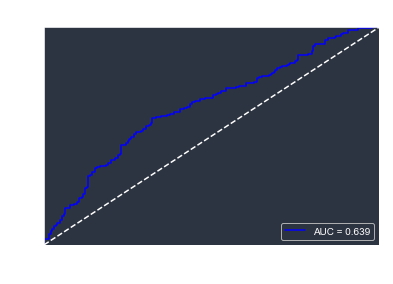

<IPython.core.display.Javascript object>

In [79]:
# Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title("ROC")
plt.plot(false_positive_rate, recall, "b", label="AUC = %0.3f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "w--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Model Deployment

## Save Model

In [ ]:
# TODO: model version control and auto-deployment

# Save the model as a pickle in a file 
joblib.dump(model, 'model.pkl') 